In [68]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [69]:
# d
# paese_dates指定日期在哪列  ;index_dates将年月日的哪个作为索引 ;date_parser将字符串转为日期
data = pd.read_csv('C:\\Users\\yyf\\Desktop\\MCM\\total\\TETCB-CA.csv', parse_dates=['Year'], index_col='Month', date_parser=dateparse)


data['Data']

ValueError: time data 'Jan-09' does not match format '%Y-%m'

In [61]:
ts=data['Data']
ts

0     3451675.175
1     3610889.845
2     3726125.494
3     3932004.855
4     4228588.588
5     4394131.242
6     4657941.900
7     4853769.753
8     5129456.632
9     5371611.427
10    5514846.233
11    5764444.554
12    5891784.323
13    6069035.525
14    5839381.124
15    6053607.969
16    6204103.239
17    6383598.968
18    6497610.435
19    6757992.284
20    6572758.373
21    6365322.314
22    6100430.351
23    6112530.508
24    6557050.673
25    6624671.518
26    6529625.049
27    6966525.735
28    7171978.000
29    7448542.852
30    7548171.431
31    7388813.414
32    7369531.972
33    7217784.052
34    7356964.239
35    7374029.634
36    7471199.100
37    7579562.292
38    7839239.703
39    7838876.822
40    7987683.987
41    7995196.742
42    8035112.732
43    8208142.326
44    8335521.140
45    8328202.618
46    8405214.664
47    8450611.850
48    8297581.965
49    8005515.051
Name: Data, dtype: float64

In [54]:
def test_stationarity(timeseries):

    # 决定起伏统计
    rolmean = pd.rolling_mean(timeseries, window=12)    # 对size个数据进行移动平均
    rol_weighted_mean = pd.ewma(timeseries, span=12)    # 对size个数据进行加权移动平均
    rolstd = pd.rolling_std(timeseries, window=12)      # 偏离原始值多少
    # 画出起伏统计
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    weighted_mean = plt.plot(rol_weighted_mean, color='green', label='weighted Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # 进行df测试
    print ('Result of Dickry-Fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value(%s)' % key] = value
    print (dfoutput)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


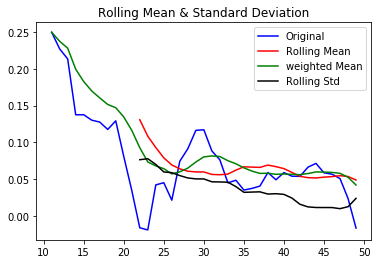

Result of Dickry-Fuller test
Test Statistic                 -2.687115
p-value                         0.076295
#Lags Used                      1.000000
Number of observations Used    37.000000
Critical value(1%)             -3.620918
Critical value(5%)             -2.943539
Critical value(10%)            -2.610400
dtype: float64


In [55]:
# estimating
ts_log = np.log(ts)
# plt.plot(ts_log)
# plt.show()
moving_avg = pd.rolling_mean(ts_log, 12)
# plt.plot(moving_avg)
# plt.plot(moving_avg,color='red')
# plt.show()
ts_log_moving_avg_diff = ts_log - moving_avg
# print ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
plt.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


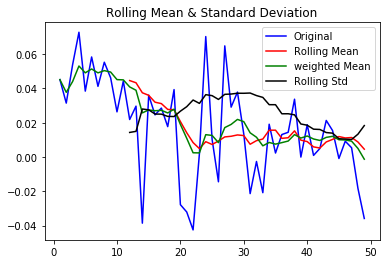

Result of Dickry-Fuller test
Test Statistic                 -4.325661
p-value                         0.000401
#Lags Used                      0.000000
Number of observations Used    48.000000
Critical value(1%)             -3.574589
Critical value(5%)             -2.923954
Critical value(10%)            -2.600039
dtype: float64


In [56]:
# 差分differencing
ts_log_diff = ts_log.diff(1)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)
plt.show()

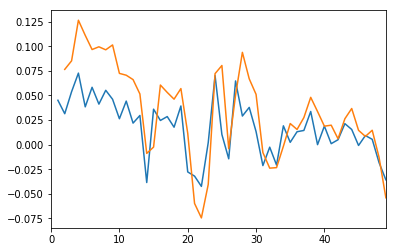

In [57]:
ts_log_diff1 = ts_log.diff(1)
ts_log_diff2 = ts_log.diff(2)
ts_log_diff1.plot()
ts_log_diff2.plot()
plt.show()

In [58]:
# 分解decomposing
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend  # 趋势
seasonal = decomposition.seasonal  # 季节性
residual = decomposition.resid  # 剩余的

plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonarity')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'